#Median Finding

In [ ]:
import math

def select(A, i):
    # Step 1: Divide into groups of 5
    groups = [sorted(A[j:j+5]) for j in range(0, len(A), 5)]

    # Step 2: Find median of each group
    medians = [grp[len(grp)//2] for grp in groups]

    # Step 3: Recursively find median of medians
    if len(medians) <= 5:
        x = sorted(medians)[len(medians)//2]
    else:
        x = select(medians, len(medians)//2)

    # Step 4: Partition around x
    lower = [a for a in A if a < x]
    equal = [a for a in A if a == x]
    higher = [a for a in A if a > x]

    k = len(lower)
    if i < k:
        return select(lower, i)
    elif i < k + len(equal):
        return x
    else:
        return select(higher, i - (k + len(equal)))

# Example usage:
A = [3, 6, 8, 1, 2, 9, 4, 7, 5]
i = 4
print("The", i+1, "th smallest element is:", select(A, i))


The 5 th smallest element is: 5


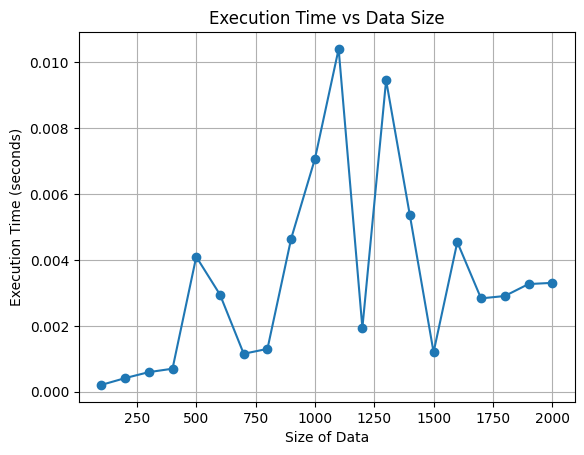

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

def select(A, i):
    groups = [sorted(A[j:j+5]) for j in range(0, len(A), 5)]
    medians = [grp[len(grp)//2] for grp in groups]
    if len(medians) <= 5:
        x = sorted(medians)[len(medians)//2]
    else:
        x = select(medians, len(medians)//2)
    lower = [a for a in A if a < x]
    equal = [a for a in A if a == x]
    higher = [a for a in A if a > x]
    k = len(lower)
    if i < k:
        return select(lower, i)
    elif i < k + len(equal):
        return x
    else:
        return select(higher, i - (k + len(equal)))

# Generate different sizes of random data
sizes = np.arange(100, 2100, 100)
times = []

for size in sizes:
    data = np.random.randint(0, 1000, size=size).tolist()
    start_time = time.time()
    select(data, size // 2)
    end_time = time.time()
    times.append(end_time - start_time)

# Plotting
plt.plot(sizes, times, marker='o')
plt.title("Execution Time vs Data Size")
plt.xlabel("Size of Data")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

#Solving the Recurrence

Substitution Method: make a guess and prove it by induction.


In [ ]:
def guess_and_prove(recurrence, guess, proof):
    """
    Recurrence relation solver using guess and prove method by induction.

    Parameters:
        recurrence (function): A function representing the recurrence relation.
        guess (function): A function representing the guessed solution.
        proof (function): A function that proves the guess by induction.

    Returns:
        Proof of the guessed solution for the recurrence relation.
    """
    return proof(guess, recurrence)

def prove_by_induction(guess, recurrence):
    """
    Proves the guess by induction.

    Parameters:
        guess (function): The guessed solution.
        recurrence (function): The recurrence relation.

    Returns:
        Proof of the guessed solution for the recurrence relation.
    """
    # Base case
    if recurrence(0) != guess(0):
        return "Guess does not match base case."

    # Inductive step
    for n in range(1, 11):  # Prove for some range of values, adjust as needed
        if recurrence(n) != guess(n):
            return f"Guess does not match for n={n}."
    return "Guess is proved by induction."

# Example usage:
# Define your recurrence relation
def recurrence(n):
    if n == 0:
        return 1
    return 2 * recurrence(n - 1)

# Guess a solution
def guess(n):
    return 2 ** n

# Prove the guess by induction
proof = guess_and_prove(recurrence, guess, prove_by_induction)
print(proof)  # Output: Proof of the guessed solution


Guess is proved by induction.


Recursion Tree Method: branching analysis

In [ ]:
def recursion_tree(recurrence, depth):
    """
    Recursion tree method to solve recurrence relation by branching analysis.

    Parameters:
        recurrence (function): A function representing the recurrence relation.
        depth (int): Depth of the recursion tree.

    Returns:
        Solution of the recurrence relation using recursion tree method.
    """
    # Base case
    if depth == 0:
        return 1

    # Recurse
    return recurrence(recurrence, depth - 1)

# Define your recurrence relation
def recurrence(tree, depth):
    if depth == 0:
        return 1
    return tree(tree, depth // 2) + depth

# Solve the recurrence using recursion tree method
solution = recursion_tree(recurrence, 3)
print(solution)  # Output: Solution of the recurrence relation


4


Master Method: read off the answer from a laundry list of already-solved recurrences

In [15]:
def master_method(a, b, f):
    """
    Master method to solve recurrence relation.

    Parameters:
        a (int): Coefficient of the recursive case.
        b (int): Factor by which the input size is reduced.
        f (function): A function representing the non-recursive part.

    Returns:
        Solution of the recurrence relation using master method.
    """
    # Calculate the value of log_b(a)
    log_a_base_b = math.log(a, b)

    if f == "n^c":
        return "Theta(n^{})".format(log_a_base_b)
    elif f == "n^c * log(n)":
        return "Theta(n^{} * log(n))".format(log_a_base_b)
    elif f == "n^c * log^k(n)":
        if log_a_base_b > 1:
            return "Theta(n^{})".format(log_a_base_b)
        elif log_a_base_b == 1:
            return "Theta(n^{} * log(n))".format(log_a_base_b)
        else:
            return "Theta(n^{})".format(math.log(a, b))
    else:
        return "Cannot solve with Master Theorem"

# Example usage:
import math

# Example recurrence relation: T(n) = 2T(n/2) + n
a = 4
b = 2
f = "n^c"
solution = master_method(a, b, f)
print(solution)  # Output: Solution of the recurrence relation


Theta(n^2.0)
